In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve, roc_auc_score
import warnings

In [2]:
df = pd.read_csv('../../65 Years of Weather Data Bangladesh (1948 - 2013).csv')
df.head()

,No,Station_Names,YEAR,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01
1,1,Barisal,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1950.01
2,2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1951.01
3,3,Barisal,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1952.01
4,4,Barisal,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1953.01


In [3]:
print(df['Station_Names'].unique())

['Barisal' 'Bhola' 'Bogra' 'Chandpur' 'Chittagong (City-Ambagan)'
 'Chittagong (IAP-Patenga)' 'Chuadanga' 'Comilla' "Cox's Bazar" 'Dhaka'
 'Dinajpur' 'Faridpur' 'Feni' 'Hatiya' 'Ishurdi' 'Jessore' 'Khepupara'
 'Khulna' 'Kutubdia' 'Madaripur' 'Maijdee Court' 'Mongla' 'Mymensingh'
 'Patuakhali' 'Rajshahi' 'Rangamati' 'Rangpur' 'Sandwip' 'Satkhira'
 'Sitakunda' 'Srimangal' 'Syedpur' 'Sylhet' 'Tangail' 'Teknaf']


In [26]:

# Players to be selected
li = ['Dinajpur','Syedpur','Rangpur','Bogra','Mymensingh']
 
df_new=df[df.Station_Names.isin(li)]
df_new

,No,Station_Names,YEAR,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
1356,1356,Bogra,1948,1,25.800000,11.700000,8.140625,74.218750,0.875926,1.1,7.296226,41883,435303.7,751187.5,24.88,89.360000,20,1948.01
1357,1357,Bogra,1949,1,27.500000,11.900000,8.140625,74.218750,0.875926,0.7,7.296226,41883,435303.7,751187.5,24.88,89.360000,20,1949.01
1358,1358,Bogra,1950,1,25.800000,11.700000,0.000000,68.000000,0.875926,0.8,7.296226,41883,435303.7,751187.5,24.88,89.360000,20,1950.01
1359,1359,Bogra,1951,1,25.800000,11.700000,5.000000,71.000000,0.875926,0.7,7.296226,41883,435303.7,751187.5,24.88,89.360000,20,1951.01
1360,1360,Bogra,1952,1,33.200000,12.300000,0.000000,66.000000,0.875926,1.0,7.296226,41883,435303.7,751187.5,24.88,89.360000,20,1952.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19651,19654,Syedpur,2009,12,28.342857,12.852381,5.333333,76.428571,1.476190,0.6,5.066667,41858,0.0,0.0,25.75,88.916667,0,2009.12
19652,19655,Syedpur,2010,12,28.342857,12.852381,5.333333,76.428571,1.476190,1.2,5.066667,41858,0.0,0.0,25.75,88.916667,0,2010.12
19653,19629,Syedpur,2011,12,30.400000,12.300000,0.000000,82.000000,4.600000,2.0,4.600000,41858,0.0,0.0,25.75,88.916667,0,2011.12
19654,19630,Syedpur,2012,12,28.400000,12.300000,0.000000,86.000000,2.400000,2.7,2.200000,41858,0.0,0.0,25.75,88.916667,0,2012.12


In [27]:
df_new.shape

(3372, 18)

In [28]:
df_new=df_new.drop(labels=["No","Station_Names","YEAR","Month","ALT","Station_Number"], axis=1)
df_new.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,X_COR,Y_COR,LATITUDE,LONGITUDE,Period
1356,25.8,11.7,8.140625,74.21875,0.875926,1.1,7.296226,435303.7,751187.5,24.88,89.36,1948.01
1357,27.5,11.9,8.140625,74.21875,0.875926,0.7,7.296226,435303.7,751187.5,24.88,89.36,1949.01
1358,25.8,11.7,0.000000,68.00000,0.875926,0.8,7.296226,435303.7,751187.5,24.88,89.36,1950.01
1359,25.8,11.7,5.000000,71.00000,0.875926,0.7,7.296226,435303.7,751187.5,24.88,89.36,1951.01
1360,33.2,12.3,0.000000,66.00000,0.875926,1.0,7.296226,435303.7,751187.5,24.88,89.36,1952.01


<AxesSubplot:xlabel='Wind_Speed', ylabel='count'>

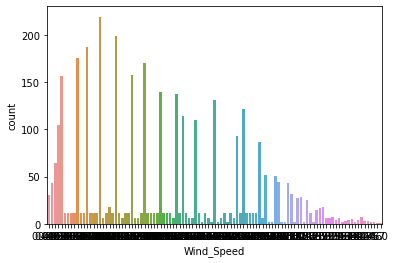

In [29]:
import seaborn as sns
sns.countplot(x = "Wind_Speed", data = df_new)

In [30]:
z = df_new["Wind_Speed"]

df_new = df_new.drop(labels=["Wind_Speed"], axis=1)
df_new['Wind_Speed'] = z
df_new.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Cloud_Coverage,Bright_Sunshine,X_COR,Y_COR,LATITUDE,LONGITUDE,Period,Wind_Speed
1356,25.8,11.7,8.140625,74.21875,1.1,7.296226,435303.7,751187.5,24.88,89.36,1948.01,0.875926
1357,27.5,11.9,8.140625,74.21875,0.7,7.296226,435303.7,751187.5,24.88,89.36,1949.01,0.875926
1358,25.8,11.7,0.000000,68.00000,0.8,7.296226,435303.7,751187.5,24.88,89.36,1950.01,0.875926
1359,25.8,11.7,5.000000,71.00000,0.7,7.296226,435303.7,751187.5,24.88,89.36,1951.01,0.875926
1360,33.2,12.3,0.000000,66.00000,1.0,7.296226,435303.7,751187.5,24.88,89.36,1952.01,0.875926


In [31]:
X = df_new.iloc[:,:-1]
Y = df_new.iloc[:,-1]

In [32]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2)

In [33]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [34]:
# MLPRegressor

from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 250,activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(trainX_scaled, trainY)

MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=250)

In [35]:
y_pred = mlp_reg.predict(testX_scaled)
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
1920,1.200000,1.494483
1563,1.740741,1.536959
13883,1.800000,1.773374
6196,0.624074,0.503926
6307,0.400000,0.583640


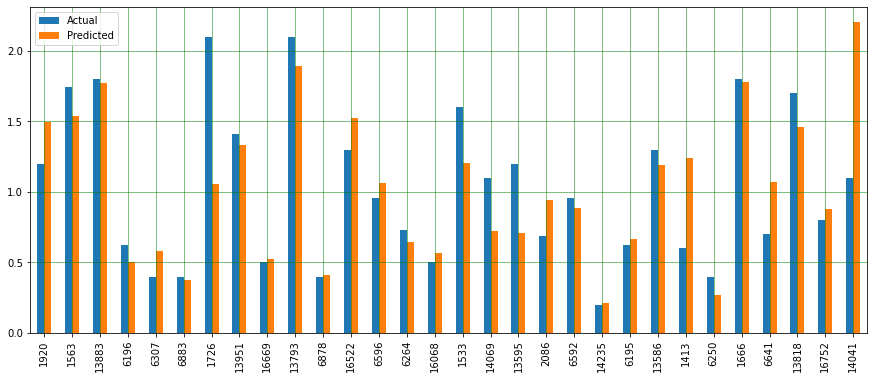

In [36]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(15,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

Text(0, 0.5, 'Cost')

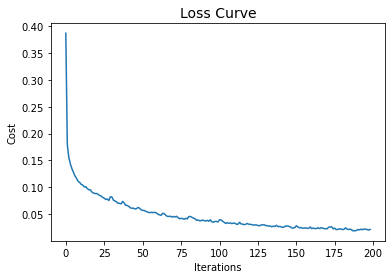

In [37]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [38]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))

Mean Absolute Error: 0.28280724046823236
Mean Squared Error: 0.17232777051091308
Root Mean Squared Error: 0.4151238014266504


In [39]:
from sklearn.metrics import r2_score
score= r2_score(testY,y_pred)
score

0.7042531438717585

In [40]:
# Hyper Parameter Tuning
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [41]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(mlp_reg, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_) 

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [42]:
grid_predictions = grid.predict(testX_scaled) 
df_temp2 = pd.DataFrame({'Actual': testY, 'Predicted': grid_predictions})
df_temp2.head()

,Actual,Predicted
1920,1.200000,1.332791
1563,1.740741,1.565411
13883,1.800000,2.434527
6196,0.624074,0.432514
6307,0.400000,0.413643


In [43]:
grid_predictions = grid.predict(testX_scaled) 
df_temp2 = pd.DataFrame({'Actual': testY, 'Predicted': grid_predictions})
df_temp2.head()

,Actual,Predicted
1920,1.200000,1.332791
1563,1.740741,1.565411
13883,1.800000,2.434527
6196,0.624074,0.432514
6307,0.400000,0.413643


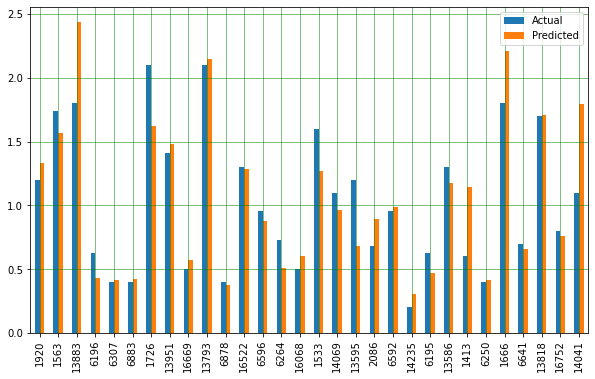

In [44]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [45]:
from sklearn.metrics import r2_score
score= r2_score(testY,grid_predictions)
score

0.7428542346318034

In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, grid_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, grid_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, grid_predictions)))

Mean Absolute Error: 0.2643959401985402
Mean Squared Error: 0.14983542689971507
Root Mean Squared Error: 0.3870858133537253
